In [ ]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [2]:
### ---- Read Data Files ---- ###

# Read in training data csv file and check head
r_Train = pd.read_csv("trainingData.csv", sep=",")
r_Validate = pd.read_csv("validationData.csv", sep=",")

In [3]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = r_Train.loc[r_Train['BUILDINGID'] == 0]
building_1 = r_Train.loc[r_Train['BUILDINGID'] == 1]
building_2 = r_Train.loc[r_Train['BUILDINGID'] == 2]


building_0_val = r_Validate.loc[r_Validate['BUILDINGID'] == 0]
building_1_val = r_Validate.loc[r_Validate['BUILDINGID'] == 1]
building_2_val = r_Validate.loc[r_Validate['BUILDINGID'] == 2]

Text(0.5, 1.0, 'Buildings by Longitude and Latitude')

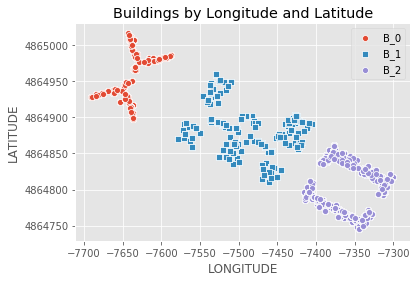

In [4]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")

In [6]:
building_2['FLOOR'].value_counts()

3    2709
1    2162
0    1942
2    1577
4    1102
Name: FLOOR, dtype: int64

In [6]:
#building_0['FLOOR'].describe()

In [8]:
## Let's run an aggregate function on entire dataframe
building_2.median()
building_2.var()
building_2.max()
#building_2.describe()

WAP001              1.000000e+02
WAP002              1.000000e+02
WAP003              1.000000e+02
WAP004              1.000000e+02
WAP005              1.000000e+02
                        ...     
SPACEID             2.540000e+02
RELATIVEPOSITION    2.000000e+00
USERID              1.800000e+01
PHONEID             2.400000e+01
TIMESTAMP           1.371725e+09
Length: 529, dtype: float64

In [12]:
b2 = building_2.drop_duplicates()

#print("Dataframe without Duplicates:\n\n", b0.head(2))

In [16]:
b2_val = building_2_val.drop_duplicates()
#print("Dataframe without Duplicates:\n\n", b0_val.head(2))

In [17]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Train = b2.copy(); 
c_Train.columns
c_Train.shape 

(9116, 529)

In [18]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Val = b2_val.copy();
c_Val.columns
c_Val.shape

(268, 529)

In [32]:
## Here I am changing the data type of the column names from Index to List

wap_names = c_Train.columns[0:520].tolist()
wap_names_val = c_Val.columns[0:520].tolist()

In [33]:
var_0_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) == 0,:]

In [34]:
var_1_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) != 0,:]

In [35]:
var_0_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) == 0,:]

In [36]:
var_1_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) != 0,:]

In [37]:
## Rename the main dataframe for simplicity

v1 = var_1_filter.copy()

In [38]:
## Subsetting the data we need into two data frames
# DF 1 shows all columns non wap

v1_waps = v1.iloc[:,0:520]

In [39]:
## Subsetting the data we need into two data frames
# DF 2 shows all columns non wap
v1_notwaps = v1.iloc[:, 520:529]

In [40]:
v1_notwaps.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

In [41]:
## Doing a precheck on values before normalising the WAPs by row 
v1_waps.max()
v1_waps.min()

WAP001    100
WAP002    100
WAP003    100
WAP004    100
WAP005    -97
         ... 
WAP516   -101
WAP517   -101
WAP518    -97
WAP519    100
WAP520    100
Length: 520, dtype: int64

In [42]:
## Subset the dataframe based on User

v1.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [43]:
sns.scatterplot()

TypeError: object of type 'NoneType' has no len()

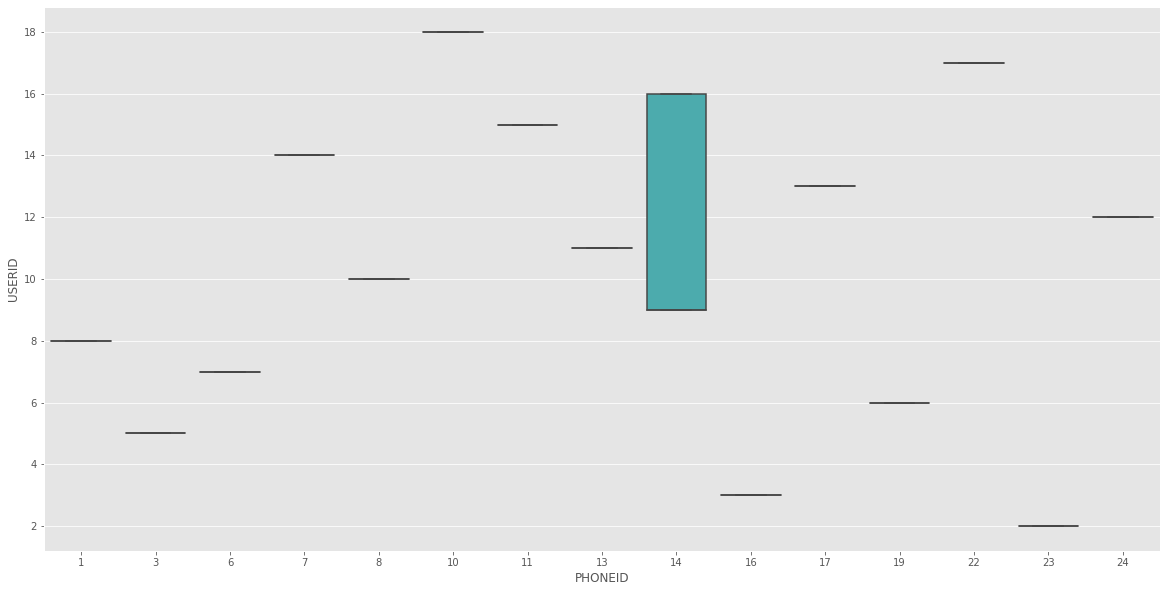

In [44]:
#### ----  LET'S LOOK AT USERS MORE CLOSELY ---- ####

x = v1.loc[:,'PHONEID']
y = v1.loc[:,'USERID']

plt.style.use('ggplot')
sns.boxplot(x, y, data=v1) # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)

In [45]:
### Select all phone ID's but exclude Phone 15 which is shared by multiple users

filt_14 = v1.loc[v1["USERID"] != 14]

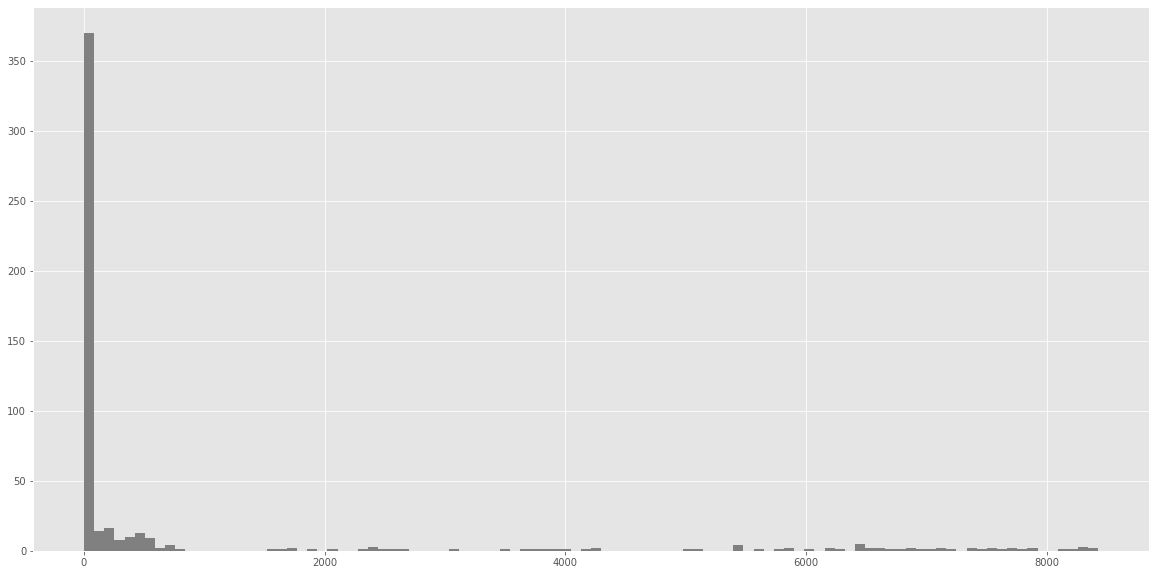

In [46]:
filt_14[wap_names].var().hist(bins=100, color="grey")

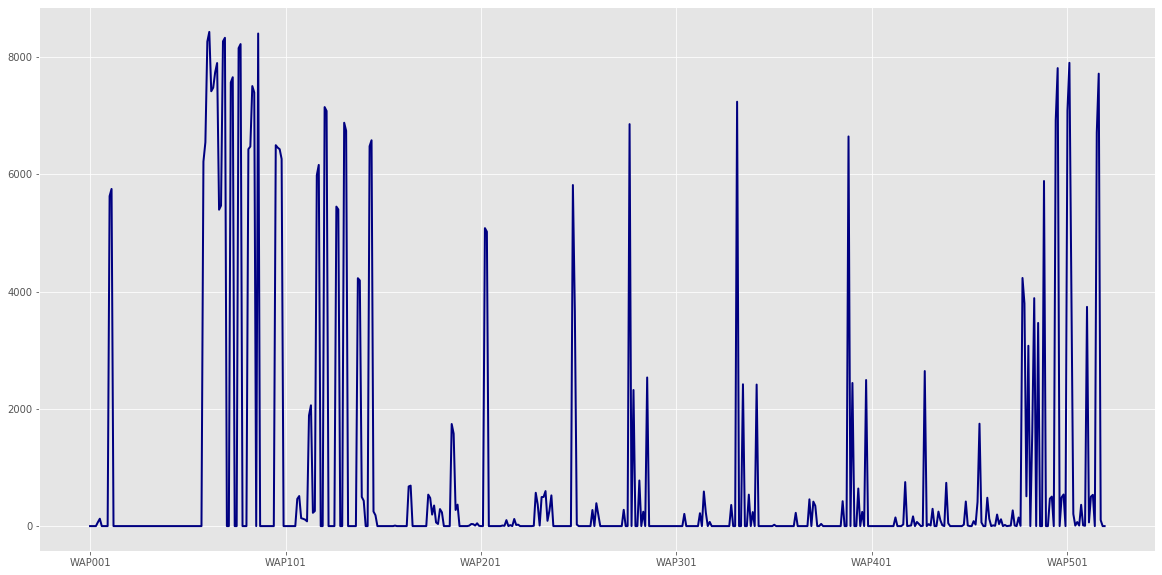

In [47]:
 filt_14.iloc[:,0:520].var().plot(linewidth=2, color="navy")

In [48]:
## Using Scikitlearn to perform normalisation 
# Alternative 1

from sklearn.preprocessing import Normalizer
X = filt_14.iloc[:,0:520]
transformer = Normalizer().fit(X) # fit does nothing in this case
transformer
transformer.transform(X)

array([[ 0.04404505,  0.04404505,  0.04404505, ...,  0.04404505,
         0.04404505,  0.04404505],
       [ 0.04414665,  0.04414665,  0.04414665, ...,  0.04414665,
         0.04414665,  0.04414665],
       [ 0.04396337,  0.04396337,  0.04396337, ..., -0.04000666,
         0.04396337,  0.04396337],
       ...,
       [ 0.04411459,  0.04411459,  0.04411459, ...,  0.04411459,
         0.04411459,  0.04411459],
       [ 0.0439384 ,  0.0439384 ,  0.0439384 , ...,  0.0439384 ,
         0.0439384 ,  0.0439384 ],
       [ 0.04401655,  0.04401655,  0.04401655, ...,  0.04401655,
         0.04401655,  0.04401655]])

In [49]:
## Here Iam selecting the User 11 fields not relating to WAP

Y = filt_14.iloc[:,520:529]

In [50]:
Y 

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
46,-7331.748000,4.864767e+06,3,2,247,2,2,23,1371716690
47,-7331.400500,4.864768e+06,3,2,248,2,2,23,1371716637
49,-7327.492165,4.864767e+06,3,2,247,1,2,23,1371716719
50,-7336.700400,4.864764e+06,3,2,246,2,2,23,1371716762
51,-7337.394800,4.864763e+06,3,2,245,2,2,23,1371716797
...,...,...,...,...,...,...,...,...,...
19926,-7331.496600,4.864768e+06,1,2,206,2,18,10,1371710239
19927,-7390.734700,4.864835e+06,1,2,141,2,18,10,1371710382
19928,-7331.463800,4.864769e+06,1,2,207,2,18,10,1371710221
19931,-7394.577825,4.864837e+06,1,2,140,1,18,10,1371710420


In [51]:
## Turn the normalised X array into a DataFrame

X_df = pd.DataFrame(X)
X_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,7929.0,7929.0,7929.0,7929.0,7929.000000,7929.000000,7929.0,7929.0,7929.0,7929.0,...,7929.000000,7929.000000,7929.000000,7929.000000,7929.0,7929.000000,7929.000000,7929.000000,7929.0,7929.0
mean,100.0,100.0,100.0,100.0,99.658847,99.333081,100.0,100.0,100.0,100.0,...,76.583554,99.665279,97.187035,97.066465,100.0,41.104679,27.015134,99.468533,100.0,100.0
std,0.0,0.0,0.0,0.0,8.112605,11.206468,0.0,0.0,0.0,0.0,...,61.155140,7.962083,22.421287,23.095014,0.0,81.930257,87.853913,10.078053,0.0,0.0
min,100.0,100.0,100.0,100.0,-97.000000,-98.000000,100.0,100.0,100.0,100.0,...,-103.000000,-97.000000,-92.000000,-90.000000,100.0,-101.000000,-101.000000,-97.000000,100.0,100.0
25%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.000000,100.000000,100.000000,100.000000,100.0,-63.000000,-77.000000,100.000000,100.0,100.0
50%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
75%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
max,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0


In [52]:
## Quick check on shape to two dataframes before rejoining

In [53]:
Y.shape

(7929, 9)

In [54]:
## Merge the normalised X array and remaining columns into a DataFrame

merged_df = pd.merge(X_df, Y, left_index = True, right_index = True)

In [55]:
normed_df = merged_df.copy()

In [56]:
normed_df = merged_df.copy()

In [57]:
normed_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

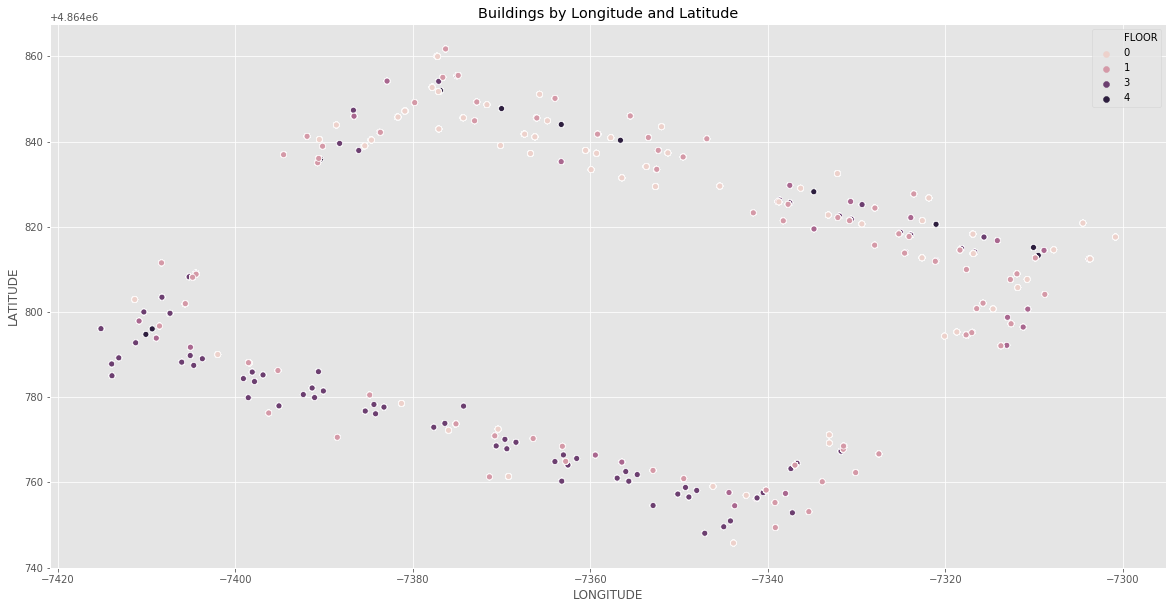

In [58]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Using the normalised and merged dataframe
plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=normed_df, hue = "FLOOR", marker = "o") # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")
plt.savefig("B0 user 1.png")

In [59]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Start making selections by User and Phone ID

In [60]:
## Create some new dataframe groupings for Users, Phones and Combination

#user_group = normed_df.groupby(["USERID"]).count()
#phone_group = normed_df.groupby(["PHONEID"]).count()
#phone_user_group = normed_df.groupby(["PHONEID", "USERID"]).count()

In [61]:
## Let's filter the WAPs by User
normed_df['USERID']

46        2
47        2
49        2
50        2
51        2
         ..
19926    18
19927    18
19928    18
19931    18
19933    18
Name: USERID, Length: 7929, dtype: int64

In [62]:
normed_df['PHONEID']

46       23
47       23
49       23
50       23
51       23
         ..
19926    10
19927    10
19928    10
19931    10
19933    10
Name: PHONEID, Length: 7929, dtype: int64

In [63]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES  ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = (normed_df.iloc[:, 0:520]) # Independent variable
y = (normed_df.loc[:, "FLOOR"]) #  Target column
#X.shape
#y.shape

In [64]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [66]:
#### ----  REGRESSION 1: GRADIENT BOOSTED TREES ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)


## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)

In [67]:
## Assigning error metrics

mse_gbt = round(mean_squared_error(y_test, y_pred), 4)
rmse_gbt = round(np.sqrt(mse_gbt), 4)
mae_gbt = round(mean_absolute_error(y_test, y_pred), 4)
r2_gbt = round(r2_score(y_test, y_pred), 4)

In [68]:
## Printing out errors in DataFrame format

model_name = "Gradient Boosted Trees"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_gbt,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_gbt,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_gbt,
      "\n\n", f"The Correlation (r2) is:\n",r2_gbt,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Gradient Boosted Trees 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 0.0855 

 The Root Mean Squared Error (RMSE) is:
 0.2924 

 The Mean Absolute Error (MAE) is:
 0.212 

 The Correlation (r2) is:
 0.9505 

 -----------------------------------------------------



In [69]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



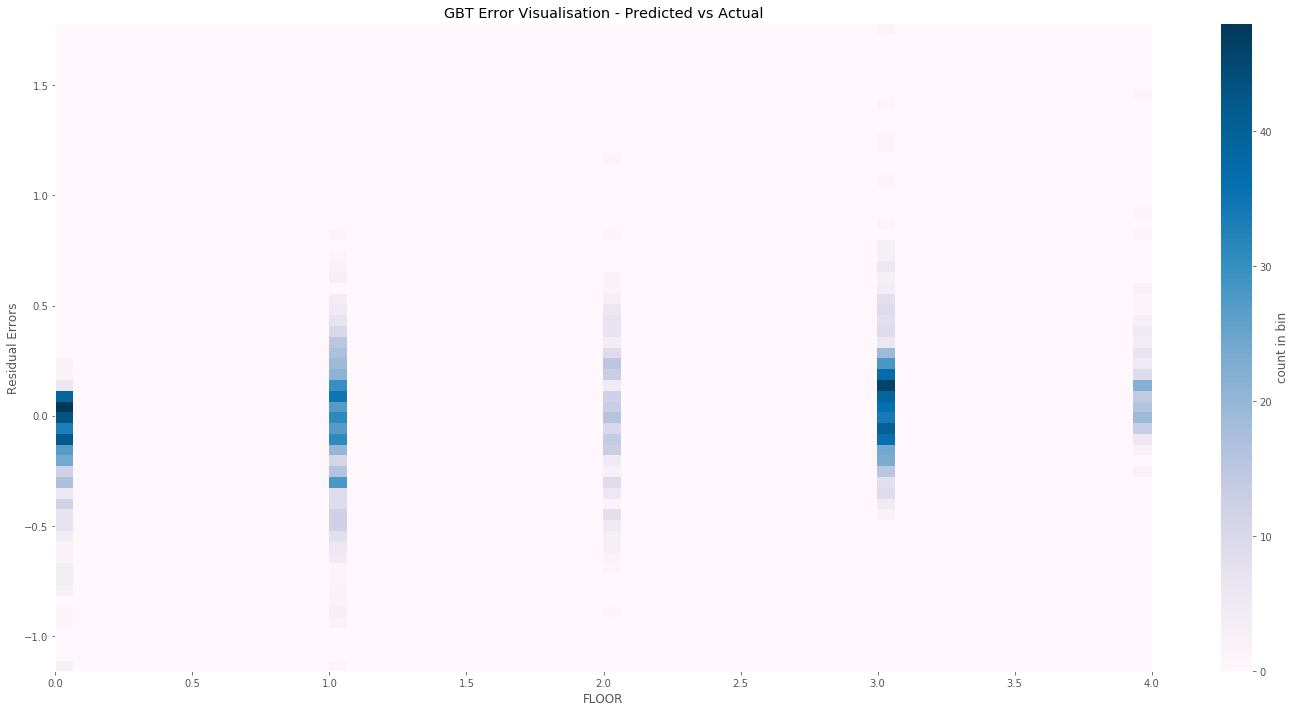

In [70]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt B1 floor.png")

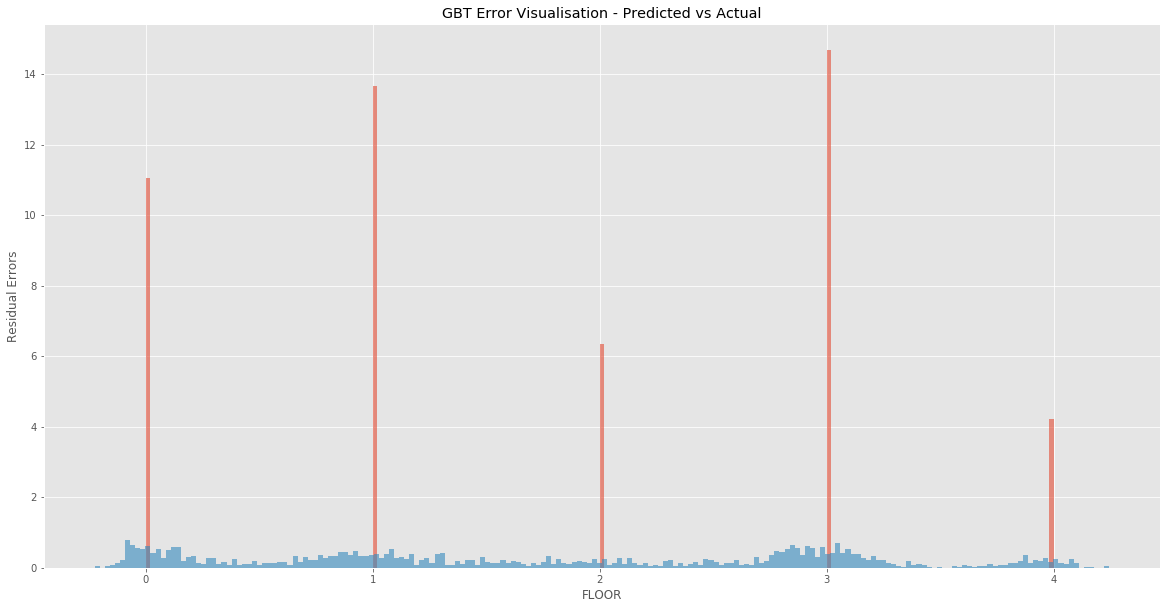

In [71]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist Building 1 - Floor.png")

In [72]:
## Let's restart the modelling with classification

In [73]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = normed_df.iloc[:, 0:520] # WAP columns
y = normed_df.loc[:, "FLOOR"] # Floor Target column


In [74]:
### Here I am moving over to Classification Modelling

#### ---- ERROR METRICS FOR CLASSIFICATION ---- ####

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import f1_score

In [109]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.linear_model import LogisticRegression

## Apply Fit mathod to training data

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = log_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [110]:
cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [111]:
model_name = "Logistic Regression"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_log, 
                                                        columns = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4"),
                                                        index = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_log,
      "\n\n", f"Precision is:\n",prec_log,
      "\n\n", f"Recall is:\n",recall_log,
      "\n\n", f"Cohen's Kappa is:\n", kappa_log,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Logistic Regression 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 0  Floor 1  Floor 2  Floor 3  Floor 4
Floor 0      344        7        0        0        0
Floor 1        9      413       11        1        0
Floor 2        0       10      182        9        0
Floor 3        0        1        5      443       17
Floor 4        0        0        0        9      125 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9502 

 Precision is:
 0.9505 

 Recall is:
 0.9502 

 Cohen's Kappa is:
 0.9351 

-----------------------------------------------------



In [112]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
9222         3 -7313.731120  4.864792e+06        3            3   True
600          3 -7341.215000  4.864756e+06        3            3   True
7067         0 -7385.426100  4.864839e+06        0            0   True
2135         3 -7345.423300  4.864830e+06        3            3   True
3383         1 -7313.731120  4.864792e+06        1            1   True
...        ...          ...           ...      ...          ...    ...
10111        3 -7338.663300  4.864826e+06        3            3   True
19756        1 -7394.577825  4.864837e+06        1            1   True
6740         0 -7333.183200  4.864823e+06        0            0   True
6290         0 -7314.611700  4.864801e+06        0            0   True
2616         4 -7384.729100  4.864840e+06        4            4   True

[1586 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 1 Floor Prediction Errors')

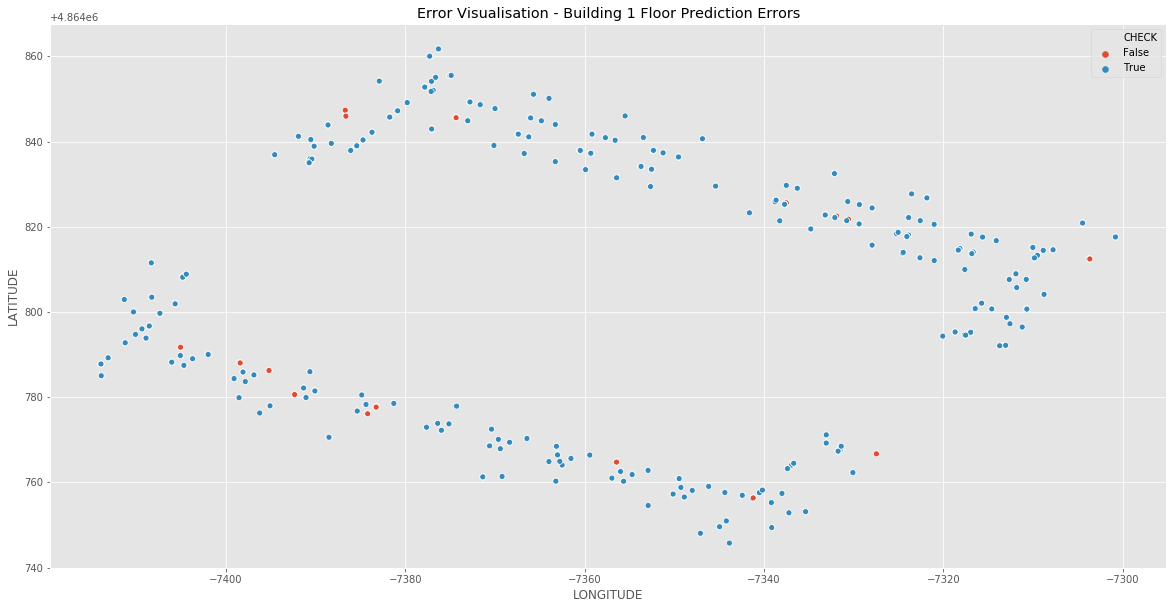

In [113]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 1 Floor Prediction Errors")

In [114]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.tree import DecisionTreeClassifier

## Apply Fit mathod to training data

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

In [115]:
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = round(accuracy_score(y_test, y_pred), 4)
prec_dt = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dt = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dt = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [116]:
model_name = "Decision Tree"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_dt, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_dt,
      "\n\n", f"Precision is:\n",prec_dt,
      "\n\n", f"Recall is:\n",recall_dt,
      "\n\n", f"Cohen's Kappa is:\n", kappa_dt,"\n\n"
       "-----------------------------------------------------\n")

ValueError: Shape of passed values is (5, 5), indices imply (4, 4)

In [117]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
9222         3 -7313.731120  4.864792e+06        3            3   True
600          3 -7341.215000  4.864756e+06        3            3   True
7067         0 -7385.426100  4.864839e+06        0            0   True
2135         3 -7345.423300  4.864830e+06        3            3   True
3383         1 -7313.731120  4.864792e+06        1            1   True
...        ...          ...           ...      ...          ...    ...
10111        3 -7338.663300  4.864826e+06        3            3   True
19756        1 -7394.577825  4.864837e+06        1            1   True
6740         0 -7333.183200  4.864823e+06        0            0   True
6290         0 -7314.611700  4.864801e+06        0            0   True
2616         4 -7384.729100  4.864840e+06        4            4   True

[1586 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

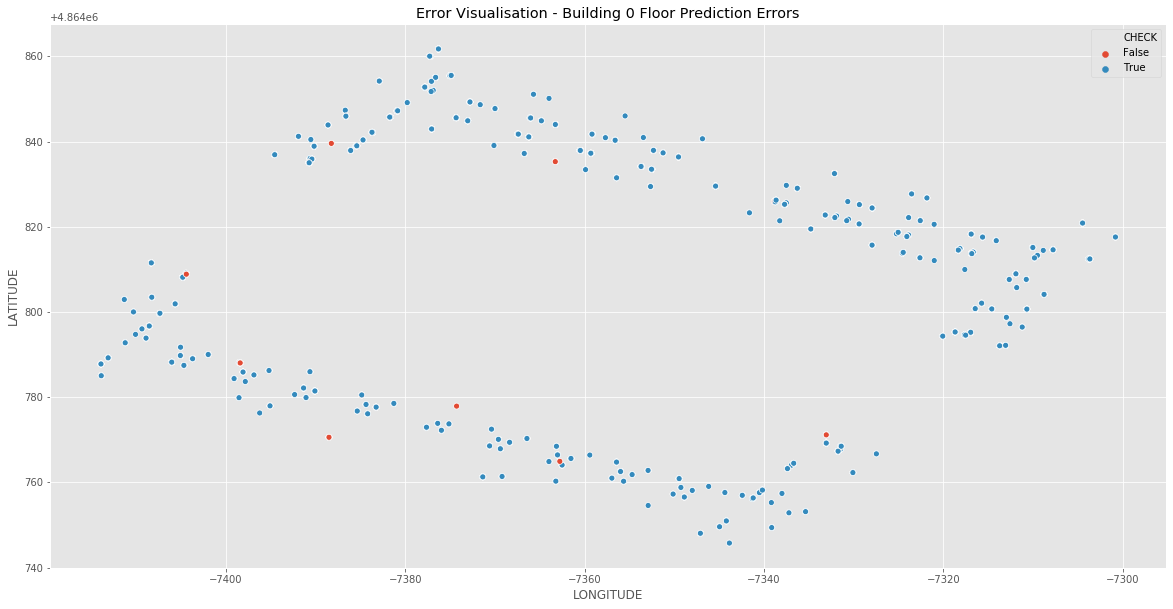

In [118]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [119]:
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Apply Fit mathod to training data

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = classifier.predict(X_test)

In [120]:
cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_knn = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [121]:
model_name = "K Nearest Neighbour"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_knn, 
                                                        columns = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4"),
                                                        index = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_knn,
      "\n\n", f"Precision is:\n",prec_knn,
      "\n\n", f"Recall is:\n",recall_knn,
      "\n\n", f"Cohen's Kappa is:\n", kappa_knn,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for K Nearest Neighbour 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 0  Floor 1  Floor 2  Floor 3  Floor 4
Floor 0      351        0        0        0        0
Floor 1       11      421        2        0        0
Floor 2        0        8      183       10        0
Floor 3        0        3        1      462        0
Floor 4        0        0        0        1      133 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9773 

 Precision is:
 0.9774 

 Recall is:
 0.9773 

 Cohen's Kappa is:
 0.9703 

-----------------------------------------------------



In [122]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
9222         3 -7313.731120  4.864792e+06        3            3   True
600          3 -7341.215000  4.864756e+06        3            3   True
7067         0 -7385.426100  4.864839e+06        0            0   True
2135         3 -7345.423300  4.864830e+06        3            3   True
3383         1 -7313.731120  4.864792e+06        1            1   True
...        ...          ...           ...      ...          ...    ...
10111        3 -7338.663300  4.864826e+06        3            3   True
19756        1 -7394.577825  4.864837e+06        1            1   True
6740         0 -7333.183200  4.864823e+06        0            0   True
6290         0 -7314.611700  4.864801e+06        0            0   True
2616         4 -7384.729100  4.864840e+06        4            4   True

[1586 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 2 Floor Prediction Errors')

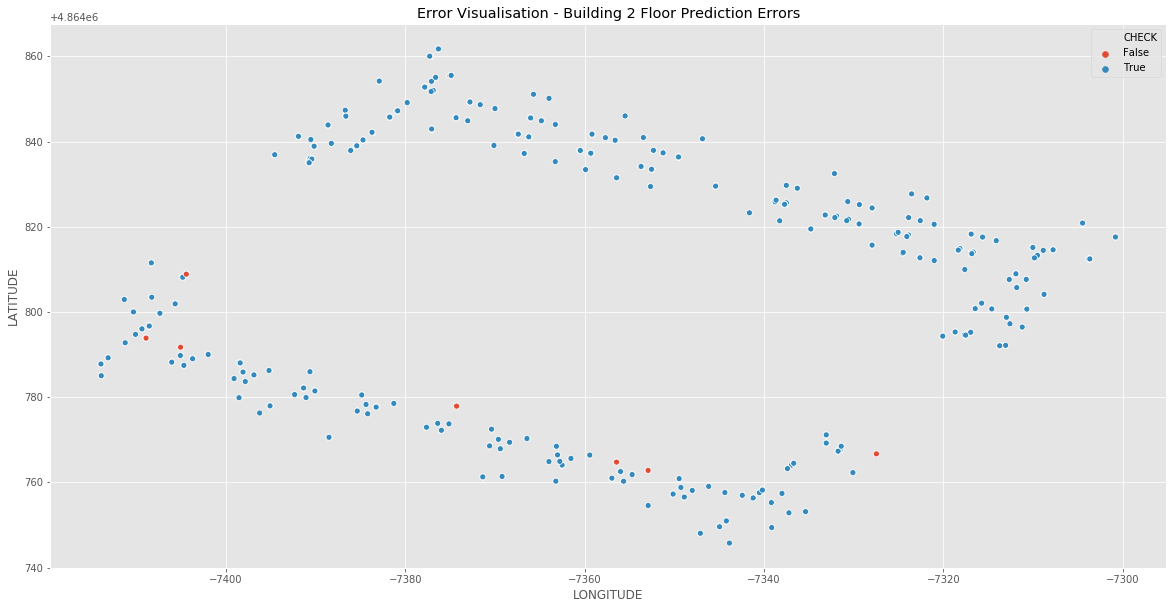

In [123]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 2 Floor Prediction Errors")

In [124]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Apply Fit mathod to training data

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = rf_clf.predict(X_test)

In [125]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [126]:
model_name = "Random Forest"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_rf, 
                                                        columns = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4"),
                                                        index = ("Floor 0", "Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_rf,
      "\n\n", f"Precision is:\n",prec_rf,
      "\n\n", f"Recall is:\n",recall_rf,
      "\n\n", f"Cohen's Kappa is:\n", kappa_rf,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Random Forest 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 0  Floor 1  Floor 2  Floor 3  Floor 4
Floor 0      351        0        0        0        0
Floor 1        0      434        0        0        0
Floor 2        0        0      201        0        0
Floor 3        0        0        0      466        0
Floor 4        0        0        0        0      134 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 1.0 

 Precision is:
 1.0 

 Recall is:
 1.0 

 Cohen's Kappa is:
 1.0 

-----------------------------------------------------



In [127]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
9222         3 -7313.731120  4.864792e+06        3            3   True
600          3 -7341.215000  4.864756e+06        3            3   True
7067         0 -7385.426100  4.864839e+06        0            0   True
2135         3 -7345.423300  4.864830e+06        3            3   True
3383         1 -7313.731120  4.864792e+06        1            1   True
...        ...          ...           ...      ...          ...    ...
10111        3 -7338.663300  4.864826e+06        3            3   True
19756        1 -7394.577825  4.864837e+06        1            1   True
6740         0 -7333.183200  4.864823e+06        0            0   True
6290         0 -7314.611700  4.864801e+06        0            0   True
2616         4 -7384.729100  4.864840e+06        4            4   True

[1586 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 2 Floor Prediction Errors')

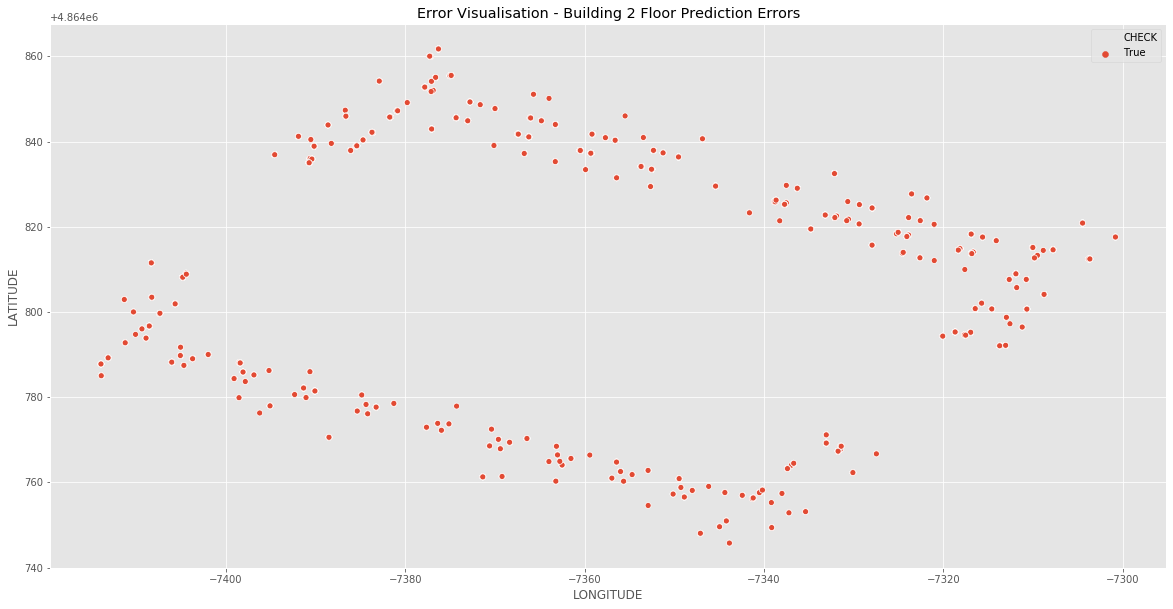

In [128]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 2 Floor Prediction Errors")

In [129]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [130]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df = pd.DataFrame(
    { #"Confusion Matrix" : [cm_log, cm_dt, cm_knn, cm_rf],
      "Accuracy" : [acc_log, acc_dt, acc_knn, acc_rf],
      "Precision" : [prec_log, prec_dt, prec_knn, prec_rf],
      "Recall" : [recall_log, recall_dt, recall_knn, recall_rf],
      "Cohen's Kapa" : [kappa_log, kappa_dt, kappa_knn, kappa_rf]},
     index = ["Logistic Regression", "Decision Tree", "K Nearest Neighbour", "Random Forest"])

error_df

,Accuracy,Precision,Recall,Cohen's Kapa
Logistic Regression,0.9502,0.9505,0.9502,0.9351
Decision Tree,0.9489,0.9492,0.9489,0.9335
K Nearest Neighbour,0.9773,0.9774,0.9773,0.9703
Random Forest,1.0000,1.0000,1.0000,1.0000


In [131]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df_flat = pd.DataFrame(
    { "Logistic Regression" : [acc_log, prec_log, recall_log, kappa_log],
      "Decision Tree" : [acc_dt, prec_dt, recall_dt, kappa_dt],
      "K Nearest Neighbour" : [acc_knn, prec_knn, recall_knn, kappa_knn],
      "Random Forest" : [acc_rf, prec_rf, recall_rf, kappa_rf]},
     index = ["Accuracy", "Precision", "Recall", "Kappa"])

error_df_flat

,Logistic Regression,Decision Tree,K Nearest Neighbour,Random Forest
Accuracy,0.9502,0.9489,0.9773,1.0
Precision,0.9505,0.9492,0.9774,1.0
Recall,0.9502,0.9489,0.9773,1.0
Kappa,0.9351,0.9335,0.9703,1.0


Text(0.5, 1.0, 'Which Model shows best error metrics')

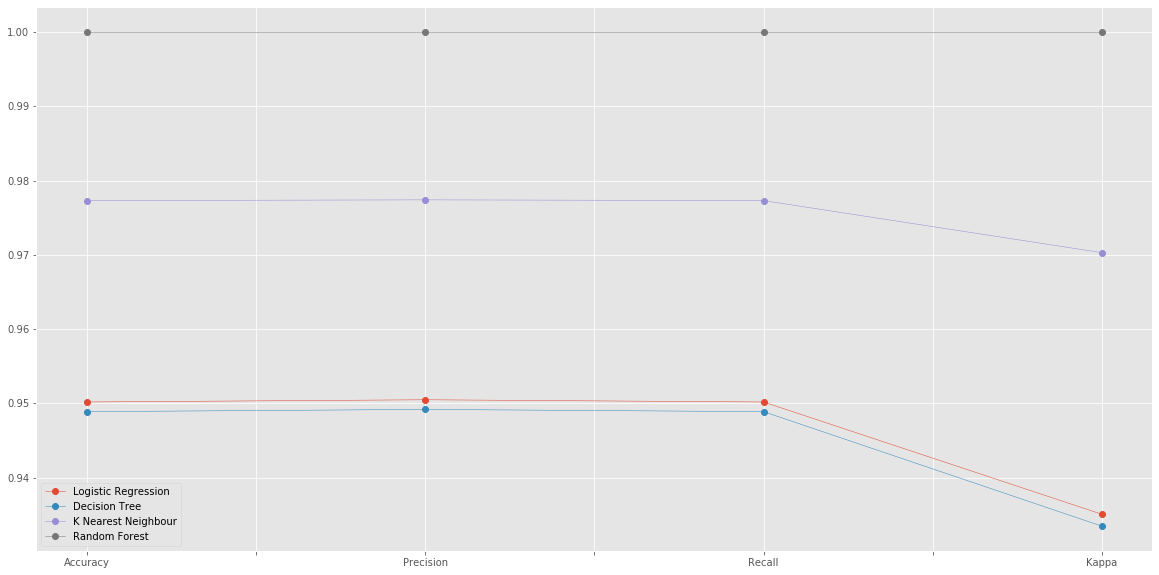

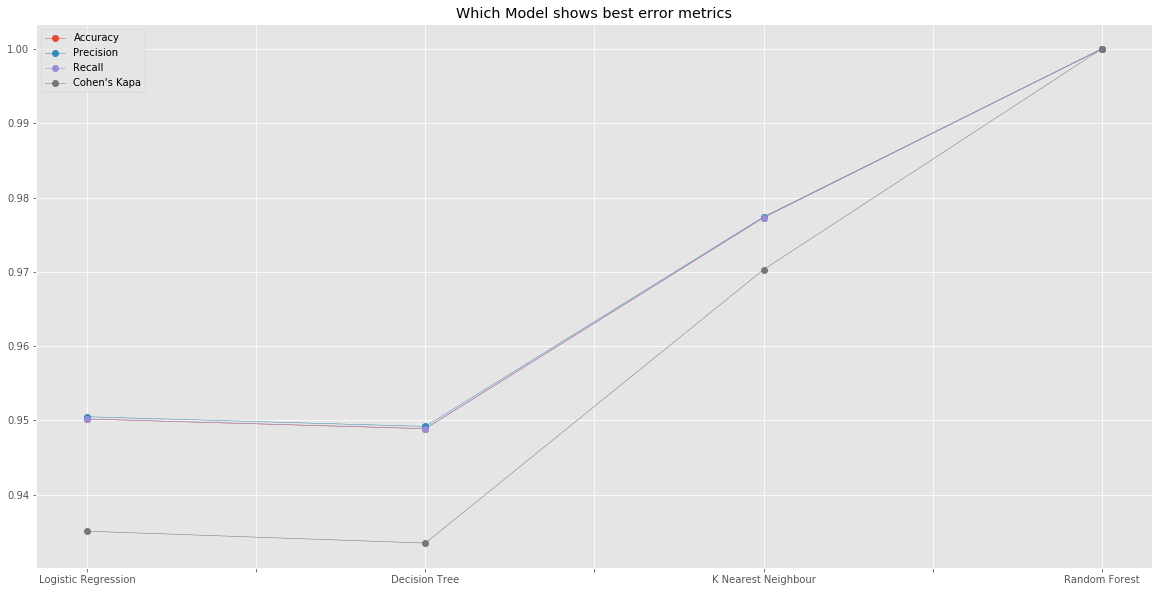

In [132]:
#### ---- VISUALISE ERROR COMPARISON TABLE ---- ####

error_df_flat.plot(marker="o", linewidth=0.5)
error_df.plot(marker="o", linewidth=0.5)
plt.title("Which Model shows best error metrics")